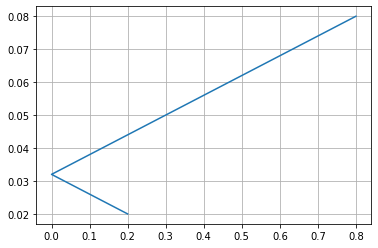

In [ ]:
mu1 = 0.02
mu2 = 0.08
sigma1 = 0.2
sigma2 = np.sqrt(0.2**2 * 16)
s = np.linspace(0, 1, 10000)
w2 = s
w1 = (1 - s)
mup = w1*mu1 + w2*mu2
rho = -1
sigp = np.sqrt((w1*sigma1)**2 + (w2*sigma2)**2 + 2*w1*w2*sigma1*sigma2*rho)
plt.plot(sigp, mup);
plt.grid();

In [2]:
sigma2

0.8

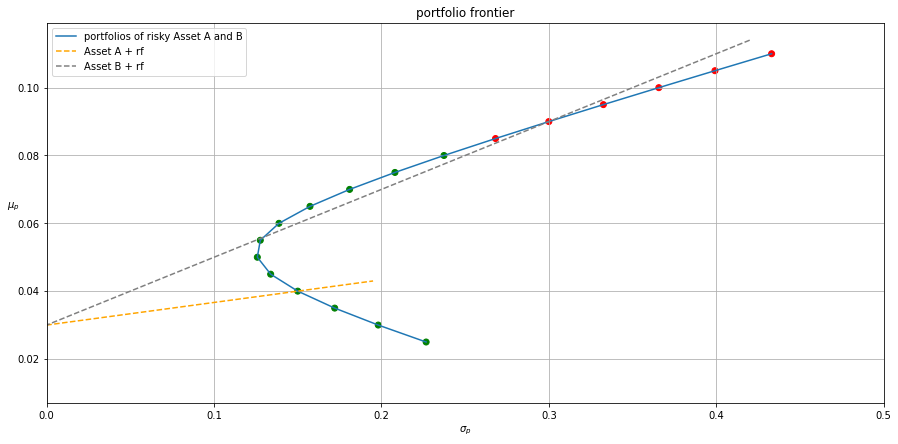

In [4]:
%matplotlib inline

muA = 0.04
muB = 0.09
r = 0.03
sigmaA = 0.15
sigmaB = 0.3
s = np.arange(-0.4,1.4,0.1)
rho = -0.15
wB = (1-s)
wA = s
mup = wA*muA + wB*muB
sigmap = np.sqrt((wA * sigmaA)**2 + (wB*sigmaB)**2 + 2*rho*wA*wB*sigmaA*sigmaB)
plt.figure(figsize=(15,7))
plt.plot(sigmap,mup,label='portfolios of risky Asset A and B');
plt.scatter(sigmap,mup,marker='o',c=['red']*6 + ['green']*12);
mup = wA*muA + (1-wA) * r
sigmap = wA * sigmaA
plt.plot(sigmap,mup,linestyle='--', color='orange',label='Asset A + rf');
mup = wB*muB + (1-wB) * r
sigmap = wB * sigmaB
plt.plot(sigmap,mup,linestyle='--', color='grey',label='Asset B + rf');
plt.title("portfolio frontier");
plt.legend(loc='best')
plt.ylabel("$\mu_p$",rotation=0);plt.xlabel("$\sigma_p$");
plt.xlim(0,0.5);
plt.grid();

In [6]:
import yfinance as yf
ticker_names = """\
TSLA SPY GOOG TSLA
"""
start = "2019-01-01"
end = "2019-12-31"

In [7]:
df = yf.download(ticker_names, start=start, end=end, progress=False)["Adj Close"]

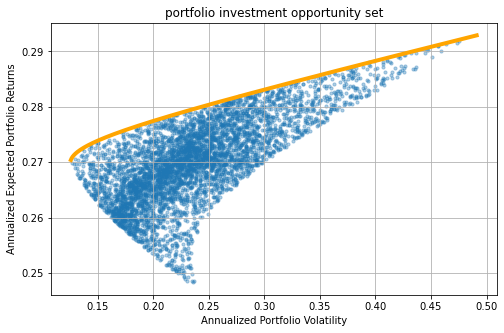

In [2]:
from marketlearn.portfolio import Harry

portfolio = Harry(df, risk_free_rate=0.02/100.)
bounds = [(0, 1) for _ in range(portfolio.security_count)]
portfolio.graph_frontier(nportfolios=5000, bounds=bounds)
plt.title("portfolio investment opportunity set");
plt.xlabel("Annualized Portfolio Volatility");
plt.ylabel("Annualized Expected Portfolio Returns");

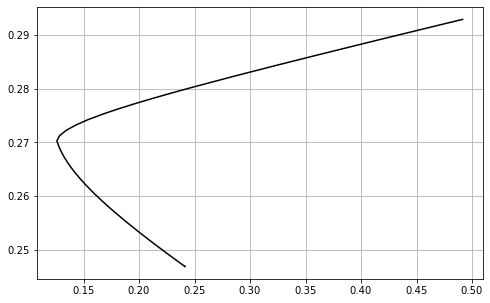

In [3]:
portfolio.graph_investment_opportunity_set(bounds)
# can take a minute to run

In [11]:
tickers = yf.Tickers('msft aapl goog')
# ^ returns a named tuple of Ticker objects

# access each ticker using (example)
tickers.tickers.MSFT.info
tickers.tickers.AAPL.history(period="1mo")

AttributeError: 'dict' object has no attribute 'MSFT'

In [22]:
v = tickers.tickers.get("MSFT")

In [32]:
all_assets = []

    __TRADING_DAYS_PER_YEAR = 252

    def __init__(self, name: str, price_history: pd.Series) -> None:
        """default constructor used to initialize Asset Class"""
        self.name = name
        self.price_history = price_history
        self.size = price_history.shape[0]
        self.returns_history = log(1 + self.price_history.pct_change())
        self.annualized_returns = self.returns_history.sum()
        self.expected_returns = self._get_expected_returns()
        self.__class__.all_assets.append(self)

Exception in thread Thread-19:
Traceback (most recent call last):
  File "/Users/raj/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/raj/anaconda3/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/raj/anaconda3/lib/python3.8/site-packages/multitasking/__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "/Users/raj/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 167, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "/Users/raj/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 179, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "/Users/raj/anaconda3/lib/python3.8/site-packages/yfinance/base.py", line 157, in history
    data = data.json()
  File "/Users/raj/anaconda3/lib/python3.8/site-packages/requests/models.py", line 898, 

KeyboardInterrupt: 

In [ ]:
def __global_minimum_variance(self, mean_constraint=False, target=None):
        """computes weights associated with global minimum variance

        This function uses the formula for global minimum variance
        # subject to constraint w'1 = 1
        # if mean constraint is true, then another constraint is added
        # w'mu = target
        """
        n = self.size + 1 if mean_constraint is False else self.size + 2
        A = np.zeros((n, n))
        ones = np.ones(self.size)
        b = np.zeros(n)
        A[: self.size, : self.size] = self.covmat * 2
        A[-1, : self.size], A[: self.size, -1] = ones, ones
        if mean_constraint is True:
            A[-2, : self.size], A[: self.size, -2] = self.mu_vec.T, self.mu_vec
            b[-2] = target
        b[-1] = 1
        return np.linalg.solve(A, b)[: self.size]
    """